In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [3]:
import numpy as np
metal3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

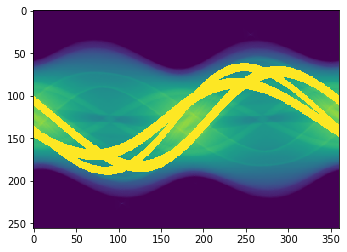

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal3_img)
plt.colorbar

In [5]:
metal3_img.shape

(256, 360)

In [6]:
result_img = metal3_img
window_size = 3

k = 0
z = 0

for i in range(256-window_size):
    for j in range(120-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] >= 250:
                    z = 0
                else:
                    if result_img[i+window_size,j] <= 50:
                        z = 0
                    else:
                        k = k+1
train_data = np.zeros((k,window_size,window_size,1))
result_data = np.zeros((k,1))

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(3, 3, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(300, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 3, 32)          64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 64)          2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          4160      
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [8]:
a = [0,1,2,3,4]
a[0:3]

[0, 1, 2]

In [9]:
k = 0

for i in range(256-window_size):
    for j in range(120-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] >= 250:
                    z = 0
                else:
                    if result_img[i+window_size,j] <= 50:
                        z = 0
                    else:
                        for v in range(window_size):
                            for w in range(window_size):
                                train_data[k,w,v,0] = result_img[i+w,j+v]
                        result_data[k,0] = int(result_img[i+window_size,j])
                        k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=1000)

(12780, 3, 3, 1)
(12780, 1)
Epoch 1/1000
400/400 [==============================] - 1s 1ms/step - loss: 5.2949 - accuracy: 0.0178
Epoch 2/1000
400/400 [==============================] - 1s 2ms/step - loss: 4.9765 - accuracy: 0.0207
Epoch 3/1000
400/400 [==============================] - 1s 1ms/step - loss: 4.9560 - accuracy: 0.0207
Epoch 4/1000
400/400 [==============================] - 1s 1ms/step - loss: 4.9316 - accuracy: 0.0192
Epoch 5/1000
400/400 [==============================] - 1s 1ms/step - loss: 4.8128 - accuracy: 0.0228
Epoch 6/1000
400/400 [==============================] - 1s 1ms/step - loss: 4.3365 - accuracy: 0.0285
Epoch 7/1000
400/400 [==============================] - 1s 1ms/step - loss: 3.9551 - accuracy: 0.0422
Epoch 8/1000
400/400 [==============================] - 1s 1ms/step - loss: 3.7733 - accuracy: 0.0488
Epoch 9/1000
400/400 [==============================] - 1s 1ms/step - loss: 3.6322 - accuracy: 0.0561
Epoch 10/1000
400/400 [==============================]

400/400 [==============================] - 1s 2ms/step - loss: 2.8065 - accuracy: 0.1173
Epoch 81/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.7871 - accuracy: 0.1238
Epoch 82/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.7953 - accuracy: 0.1177
Epoch 83/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.7841 - accuracy: 0.1213
Epoch 84/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.7684 - accuracy: 0.1276
Epoch 85/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.7778 - accuracy: 0.1228
Epoch 86/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.7589 - accuracy: 0.1230
Epoch 87/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.7584 - accuracy: 0.1246
Epoch 88/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.7800 - accuracy: 0.1228
Epoch 89/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.7483 - a

400/400 [==============================] - 1s 2ms/step - loss: 2.5956 - accuracy: 0.1407
Epoch 160/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.5676 - accuracy: 0.1480
Epoch 161/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.5836 - accuracy: 0.1486
Epoch 162/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.5521 - accuracy: 0.1563
Epoch 163/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.5601 - accuracy: 0.1531
Epoch 164/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.5639 - accuracy: 0.1509
Epoch 165/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.5549 - accuracy: 0.1519
Epoch 166/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.5543 - accuracy: 0.1514
Epoch 167/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.5490 - accuracy: 0.1540
Epoch 168/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

400/400 [==============================] - 1s 2ms/step - loss: 2.4021 - accuracy: 0.1776
Epoch 238/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.4104 - accuracy: 0.1811
Epoch 239/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.4085 - accuracy: 0.1743
Epoch 240/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.4035 - accuracy: 0.1794
Epoch 241/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.4062 - accuracy: 0.1803
Epoch 242/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.3910 - accuracy: 0.1805
Epoch 243/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.4292 - accuracy: 0.1757
Epoch 244/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.4012 - accuracy: 0.1728
Epoch 245/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.4300 - accuracy: 0.1772
Epoch 246/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

400/400 [==============================] - 1s 2ms/step - loss: 2.3203 - accuracy: 0.1932
Epoch 316/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.3121 - accuracy: 0.1947
Epoch 317/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.3210 - accuracy: 0.1916
Epoch 318/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.3151 - accuracy: 0.1919
Epoch 319/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2924 - accuracy: 0.1970
Epoch 320/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.3349 - accuracy: 0.1911
Epoch 321/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.3243 - accuracy: 0.1871
Epoch 322/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.3286 - accuracy: 0.1849
Epoch 323/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.3182 - accuracy: 0.1858
Epoch 324/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

400/400 [==============================] - 1s 2ms/step - loss: 2.2644 - accuracy: 0.2066
Epoch 394/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2771 - accuracy: 0.2020
Epoch 395/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2570 - accuracy: 0.2034
Epoch 396/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2694 - accuracy: 0.2008
Epoch 397/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2751 - accuracy: 0.2016
Epoch 398/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2620 - accuracy: 0.2049
Epoch 399/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2592 - accuracy: 0.2007
Epoch 400/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2821 - accuracy: 0.1987
Epoch 401/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2655 - accuracy: 0.2047
Epoch 402/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

400/400 [==============================] - 1s 2ms/step - loss: 2.2342 - accuracy: 0.2102
Epoch 472/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2082 - accuracy: 0.2142
Epoch 473/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2038 - accuracy: 0.2167
Epoch 474/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2247 - accuracy: 0.2095
Epoch 475/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2368 - accuracy: 0.2060
Epoch 476/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2178 - accuracy: 0.2149
Epoch 477/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2187 - accuracy: 0.2112
Epoch 478/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2203 - accuracy: 0.2064
Epoch 479/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2111 - accuracy: 0.2135
Epoch 480/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

400/400 [==============================] - 1s 2ms/step - loss: 2.1766 - accuracy: 0.2191
Epoch 550/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2180 - accuracy: 0.2158
Epoch 551/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1848 - accuracy: 0.2144
Epoch 552/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.2017 - accuracy: 0.2171
Epoch 553/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1708 - accuracy: 0.2243
Epoch 554/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1713 - accuracy: 0.2250
Epoch 555/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1728 - accuracy: 0.2210: 0s - loss: 2.187
Epoch 556/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1857 - accuracy: 0.2218
Epoch 557/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1753 - accuracy: 0.2257
Epoch 558/1000
400/400 [==============================] - 1s 

400/400 [==============================] - 1s 2ms/step - loss: 2.1436 - accuracy: 0.2299
Epoch 628/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1525 - accuracy: 0.2286
Epoch 629/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1498 - accuracy: 0.2207
Epoch 630/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1514 - accuracy: 0.2207
Epoch 631/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1459 - accuracy: 0.2294
Epoch 632/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1642 - accuracy: 0.2221
Epoch 633/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1393 - accuracy: 0.2349
Epoch 634/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1464 - accuracy: 0.2278
Epoch 635/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1410 - accuracy: 0.2239
Epoch 636/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

400/400 [==============================] - 1s 2ms/step - loss: 2.1488 - accuracy: 0.2273
Epoch 706/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1318 - accuracy: 0.2310
Epoch 707/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1445 - accuracy: 0.2286
Epoch 708/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1252 - accuracy: 0.2274
Epoch 709/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1639 - accuracy: 0.2258
Epoch 710/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1058 - accuracy: 0.2375
Epoch 711/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1157 - accuracy: 0.2288
Epoch 712/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1273 - accuracy: 0.2322
Epoch 713/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1125 - accuracy: 0.2372
Epoch 714/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

400/400 [==============================] - 1s 2ms/step - loss: 2.1199 - accuracy: 0.2347
Epoch 784/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1100 - accuracy: 0.2327
Epoch 785/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1000 - accuracy: 0.2383
Epoch 786/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1138 - accuracy: 0.2341
Epoch 787/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1165 - accuracy: 0.2289
Epoch 788/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0849 - accuracy: 0.2459
Epoch 789/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0975 - accuracy: 0.2404
Epoch 790/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1024 - accuracy: 0.2359
Epoch 791/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0931 - accuracy: 0.2332
Epoch 792/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

400/400 [==============================] - 1s 2ms/step - loss: 2.0917 - accuracy: 0.2416
Epoch 862/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1074 - accuracy: 0.2379
Epoch 863/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0990 - accuracy: 0.2387
Epoch 864/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1054 - accuracy: 0.2455
Epoch 865/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0795 - accuracy: 0.2451
Epoch 866/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.1055 - accuracy: 0.2356
Epoch 867/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0888 - accuracy: 0.2421
Epoch 868/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0807 - accuracy: 0.2451
Epoch 869/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0910 - accuracy: 0.2416
Epoch 870/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

400/400 [==============================] - 1s 2ms/step - loss: 2.0495 - accuracy: 0.2541
Epoch 940/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0890 - accuracy: 0.2403
Epoch 941/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0653 - accuracy: 0.2457
Epoch 942/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0805 - accuracy: 0.2422
Epoch 943/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0662 - accuracy: 0.2442
Epoch 944/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0564 - accuracy: 0.2495
Epoch 945/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0986 - accuracy: 0.2395
Epoch 946/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0551 - accuracy: 0.2447
Epoch 947/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.0463 - accuracy: 0.2473
Epoch 948/1000
400/400 [==============================] - 1s 2ms/step - loss: 2

In [10]:
for i in range(256-window_size):
    for j in range(120-window_size):
        if 300 in result_img[i:i+window_size, j:j+window_size]:
            z = 0
        else:
            if result_img[i+window_size,j] == 300:
                test_data = np.zeros((1,window_size,window_size,1))
                for v in range(window_size):
                    for w in range(window_size):
                        test_data[0,w,v,0] = result_img[i+w,j+v]
                prediction = model.predict(test_data)
                result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

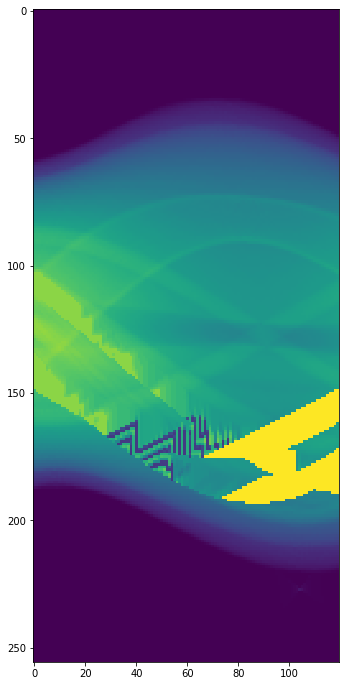

In [11]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:120])
plt.colorbar

In [12]:
# plt.imshow(result_img)
# plt.colorbar
# plt.axis('off'), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.savefig('images/RCNN3(100)_test.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [13]:
# np.savetxt('images/CNN_Metal3_3by3_txt.txt', result_img)